In [1471]:
import numpy as np
import pandas as pd

from ast import literal_eval

import matplotlib.pyplot as plt

In [1472]:
plt.style.use('seaborn-v0_8')
plt.rcParams["grid.linestyle"] = "--"

plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.facecolor'] = "lavender"

In [1473]:
columns_to_eval = [
    "global_mouse_position",
    "button_cooldown_times",
    "logical_frames_since_last_button_press",
    "global_position",
    "velocity",
    "fruits_cut_this_frame_list",
    "fruits_hit_ninjas_ass_this_frame_list",
    "fruits_on_screen_this_frame_list",
    "fruits_spawned_this_frame_list",
    "stupid_fucking_fruits_that_died_this_frame_list",
]

df = pd.read_csv("train_data/output.csv", converters={column: literal_eval for column in columns_to_eval})
df.head()

,cheat_flag,frame_count,session_id,combo,global_mouse_position,is_combo_going,logical_dt,phys_frames_since_last_combo,physical_dt,score,...,is_stunned,speed,velocity,fruits_cut_this_frame_list,fruits_hit_ninjas_ass_this_frame_list,fruits_on_screen_this_frame,fruits_on_screen_this_frame_list,fruits_spawned_this_frame_list,is_aiming,stupid_fucking_fruits_that_died_this_frame_list
0,0,1,1702382841,0,"[0, 0]",False,0.016667,1103,0.016667,0,...,False,100,"[0.0528810359537601, 1.66582763195038]",[],[],[],[],[],False,[]
1,0,2,1702382841,0,"[0, 0]",False,0.016667,1104,0.016667,0,...,False,100,"[0.173977315425873, 1.65756142139435]",[],[],[],[],[],False,[]
2,0,3,1702382841,0,"[0, 0]",False,0.016667,1105,0.016667,0,...,False,100,"[0.325032502412796, 1.63466572761536]",[],[],[],[],[],False,[]
3,0,4,1702382841,0,"[0, 0]",False,0.016667,1106,0.016667,0,...,False,100,"[0.186604306101799, 1.65618753433228]",[],[],[],[],[],False,[]
4,0,5,1702382841,0,"[0, 0]",False,0.016667,1107,0.016667,0,...,False,100,"[0.165572926402092, 1.6584221124649]",[],[],[],[],[],False,[]


In [1474]:
df["fruits_spawned_num"] = df["fruits_spawned_this_frame_list"].str.len()
df["fruits_on_screen_num"] = df["fruits_on_screen_this_frame_list"].str.len()
df["fruits_missed_num"] = df["stupid_fucking_fruits_that_died_this_frame_list"].str.len()

projectiles = ["Apple", "Banana", "Grape", "Pineapple", "Watermelon", "Coconut", "Cherry"]

df["fruit_name_spawned"] = df["fruits_spawned_this_frame_list"].apply(lambda x: projectiles.index(x[0]["name"]) if len(x) != 0 else -1)

df.head()

,cheat_flag,frame_count,session_id,combo,global_mouse_position,is_combo_going,logical_dt,phys_frames_since_last_combo,physical_dt,score,...,fruits_hit_ninjas_ass_this_frame_list,fruits_on_screen_this_frame,fruits_on_screen_this_frame_list,fruits_spawned_this_frame_list,is_aiming,stupid_fucking_fruits_that_died_this_frame_list,fruits_spawned_num,fruits_on_screen_num,fruits_missed_num,fruit_name_spawned
0,0,1,1702382841,0,"[0, 0]",False,0.016667,1103,0.016667,0,...,[],[],[],[],False,[],0,0,0,-1
1,0,2,1702382841,0,"[0, 0]",False,0.016667,1104,0.016667,0,...,[],[],[],[],False,[],0,0,0,-1
2,0,3,1702382841,0,"[0, 0]",False,0.016667,1105,0.016667,0,...,[],[],[],[],False,[],0,0,0,-1
3,0,4,1702382841,0,"[0, 0]",False,0.016667,1106,0.016667,0,...,[],[],[],[],False,[],0,0,0,-1
4,0,5,1702382841,0,"[0, 0]",False,0.016667,1107,0.016667,0,...,[],[],[],[],False,[],0,0,0,-1


In [1475]:
N = len(df)  # samples to generate
N

11182

In [1476]:
synthetic_df = df.copy()[["cheat_flag", "frame_count", "session_id"]]
synthetic_df["session_id"] = 9_999_999_999 - synthetic_df["session_id"][::-1]
synthetic_df.head()

,cheat_flag,frame_count,session_id
0,0,1,8297617158
1,0,2,8297617158
2,0,3,8297617158
3,0,4,8297617158
4,0,5,8297617158


# is_combo_going

In [1477]:
df["is_combo_going"].value_counts(normalize=True)

is_combo_going
False    0.521374
True     0.478626
Name: proportion, dtype: float64

In [1478]:
success_prob = df["is_combo_going"].value_counts(normalize=True)[True]
success_prob

0.4786263637989626

In [1479]:
synthetic_data = np.random.binomial(n=1, p=success_prob, size=N).astype(bool)
np.mean(synthetic_data)

0.47254516186728673

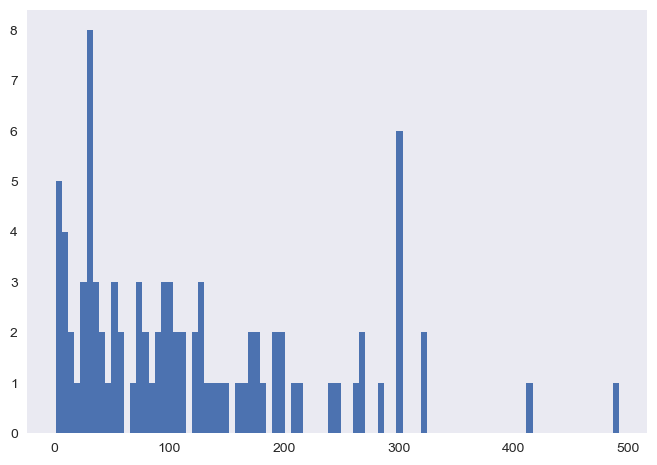

In [1480]:
from itertools import groupby

def find_sequence_lengths(bool_array):
    lengths = [len(list(group)) for _, group in groupby(bool_array)]
    return lengths

bool_array = df["is_combo_going"].to_numpy().astype(int)
result = find_sequence_lengths(bool_array)

# print(result_dict)

plt.hist(result, bins=len(result));

In [1481]:
from hmmlearn import hmm

training_data = df["is_combo_going"].values

training_data_numeric = training_data.astype(int).reshape(-1, 1)

model = hmm.CategoricalHMM(n_components=2, n_iter=1_000)
model.fit(training_data_numeric)

num_samples = len(training_data)

In [1482]:
a = find_sequence_lengths(training_data)
a[:10], len(a)

([123, 300, 110, 107, 67, 127, 30, 26, 29, 89], 91)

In [1483]:
synthetic_sequence, _ = model.sample(n_samples=num_samples)
synthetic_sequence = (synthetic_sequence.flatten() == 1)

b = find_sequence_lengths(synthetic_sequence)
b[:10], len(b)

([246, 55, 538, 90, 64, 103, 2, 11, 31, 4], 85)

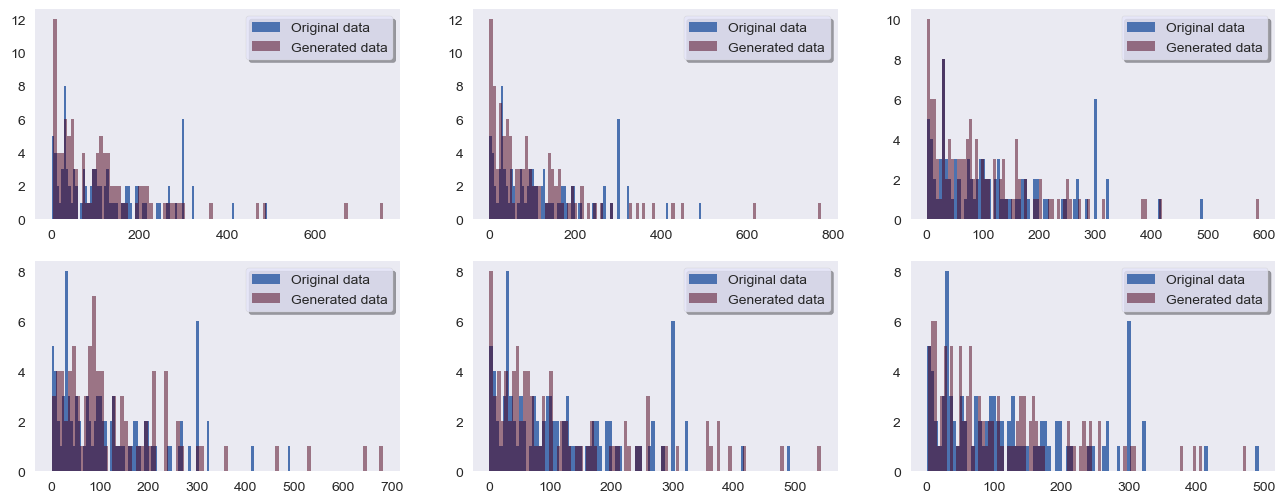

In [1484]:
# plt.hist(a, label="Original data", bins=len(a))

rows, cols = 2, 3

plt.figure(figsize=(16, 6))

a = find_sequence_lengths(training_data)

for i in range(1, rows * cols + 1):
    synthetic_sequence, _ = model.sample(n_samples=N)
    synthetic_sequence = (synthetic_sequence.flatten() == 1)
    b = find_sequence_lengths(synthetic_sequence)
    # print(b)
    # b = np.digitize(b, np.arange(0, np.max(a), len(a)))
    # print(b)

    plt.subplot(rows, cols, i)
    plt.hist(a, label="Original data", bins=len(a))
    plt.hist(b, color=(0.3, 0, 0.1, 0.5), label="Generated data", bins=len(b))
    plt.legend()

plt.show()

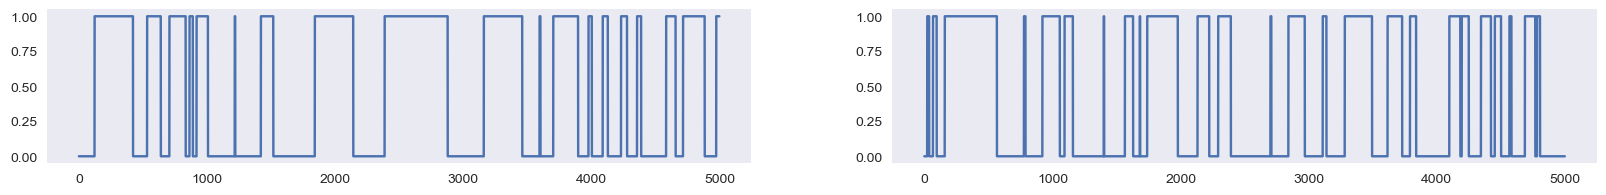

In [1485]:
plt.figure(figsize=(20, 2))

plt.subplot(1, 2, 1)
plt.plot(training_data.astype(int)[:5000])

plt.subplot(1, 2, 2)
plt.plot(synthetic_sequence.astype(int)[:5000]);

In [1486]:
synthetic_df["is_combo_going"] = synthetic_sequence
synthetic_df.head()

,cheat_flag,frame_count,session_id,is_combo_going
0,0,1,8297617158,False
1,0,2,8297617158,False
2,0,3,8297617158,False
3,0,4,8297617158,False
4,0,5,8297617158,False


# combo

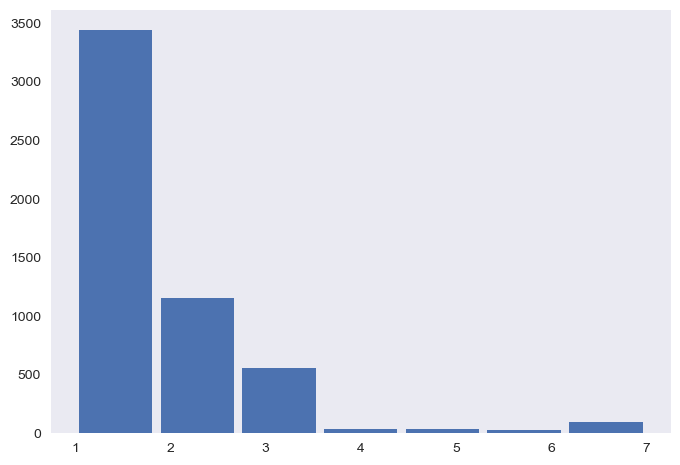

In [1683]:
nonzero_combo = df[df["is_combo_going"] == True]["combo"]
plt.hist(nonzero_combo, rwidth=0.9, bins=nonzero_combo.max());

In [1679]:
combo_probs = nonzero_combo.value_counts(normalize=True)
combo_probs.sort_index()

combo
1    0.642750
2    0.215994
3    0.104634
4    0.006353
5    0.007287
6    0.005605
7    0.017377
Name: proportion, dtype: float64

In [1680]:
k = np.random.normal(1, 0.1, len(combo_probs))
a = combo_probs.values + 0.0005 / combo_probs.values * k
a = a / np.sum(a)
a

array([0.50598878, 0.17164429, 0.08689135, 0.04000715, 0.05670647,
       0.06575922, 0.07300275])

In [1681]:
np.random.choice(combo_probs.index.values, 10, p=combo_probs.values)

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 1])

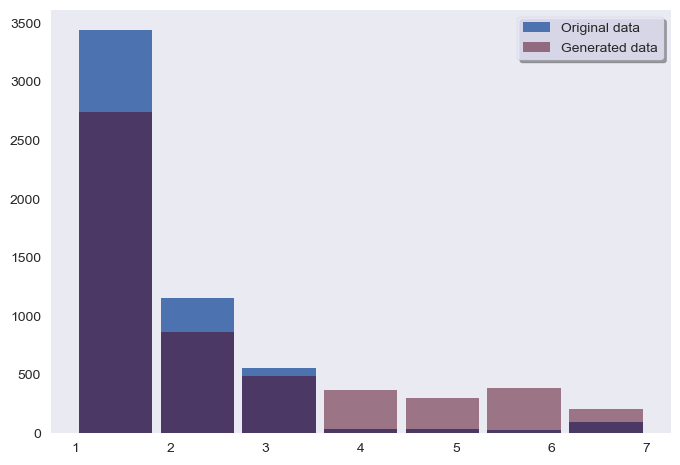

In [1684]:
synthetic_data = np.random.choice(combo_probs.index.values, len(nonzero_combo), p=a)
plt.hist(nonzero_combo, rwidth=0.9, label="Original data", bins=nonzero_combo.max())
plt.hist(synthetic_data, rwidth=0.9, color=(0.3, 0, 0.1, 0.5), label="Generated data", bins=nonzero_combo.max())
plt.legend();

In [1693]:
combo_num = len(find_sequence_lengths(synthetic_sequence)) // 2
combo_num

50

In [1704]:
synthetic_combo = np.random.choice(combo_probs.index.values, combo_num, p=a)
synthetic_combo
# synthetic_combo_unraveled = list(map(lambda x: [x[0]] * x[1], zip(synthetic_combo, find_sequence_lengths(synthetic_sequence))))
# synthetic_combo_flattened = sum(synthetic_combo_unraveled, [])
#
# synthetic_df["combo"] = 0
# synthetic_df[synthetic_df["is_combo_going"]]["combo"] = synthetic_combo_flattened
# synthetic_df

array([1, 1, 2, 1, 7, 1, 1, 6, 7, 1, 4, 3, 1, 5, 3, 2, 3, 1, 6, 1, 3, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 5, 1, 1, 2, 1,
       7, 1, 3, 6, 1, 1])

# fruits_spawned_num

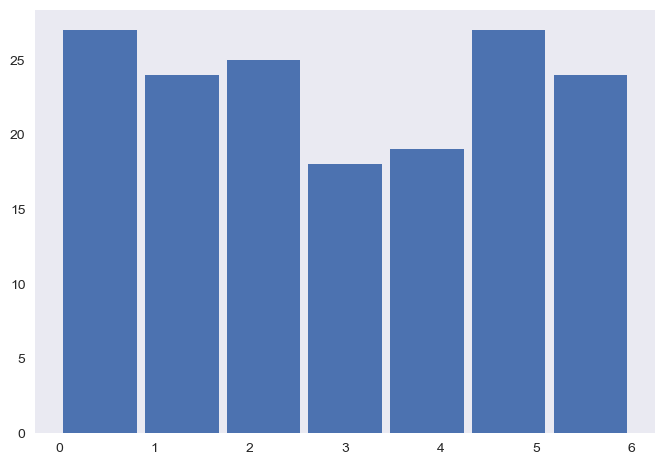

In [1492]:
plt.hist(df[df["fruit_name_spawned"] != -1]["fruit_name_spawned"], rwidth=0.9, bins=len(projectiles));

In [1493]:
fruit_prob = df["fruits_spawned_num"].value_counts(normalize=True).sort_index()
fruit_prob

fruits_spawned_num
0    0.985334
1    0.014666
Name: proportion, dtype: float64

In [1494]:
k = 0.1 * np.random.rand(1)[0]
k

0.03664894196054707

In [1495]:
fruit_prob[0] - k, fruit_prob[1] + k

(0.9486846298512934, 0.051315370148706616)

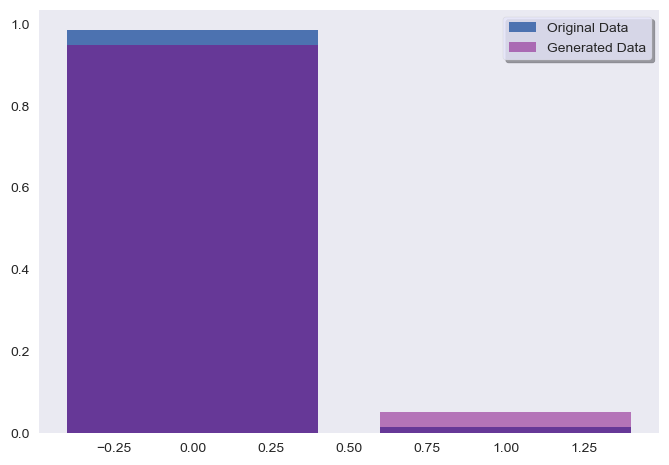

In [1496]:
plt.bar(fruit_prob.index, height=fruit_prob.values, label="Original Data")
plt.bar(fruit_prob.index, height=[fruit_prob[0] - k, fruit_prob[1] + k], alpha=0.5, color="purple", label="Generated Data")
plt.legend();

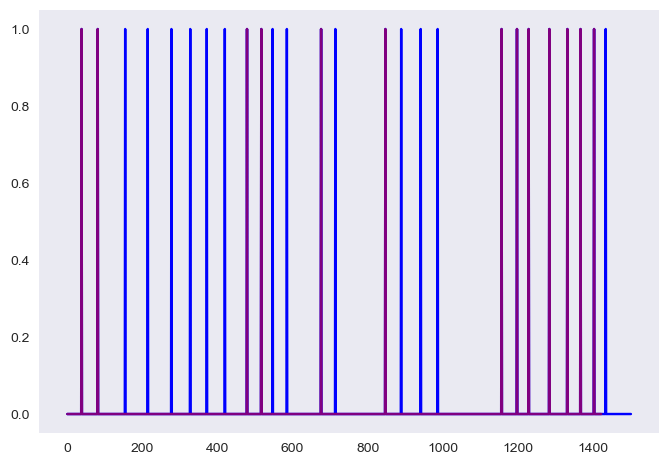

In [1497]:
L = 1500
chunk = df[(df["frame_count"] < L + 1) & (df["session_id"] == 1702382841)]

plt.plot(chunk["frame_count"], chunk["fruits_spawned_num"], c="blue", label="No combo")
plt.plot(chunk[chunk["is_combo_going"] == False]["frame_count"], chunk[chunk["is_combo_going"] == False]["fruits_spawned_num"], c="purple", label="Is combo")


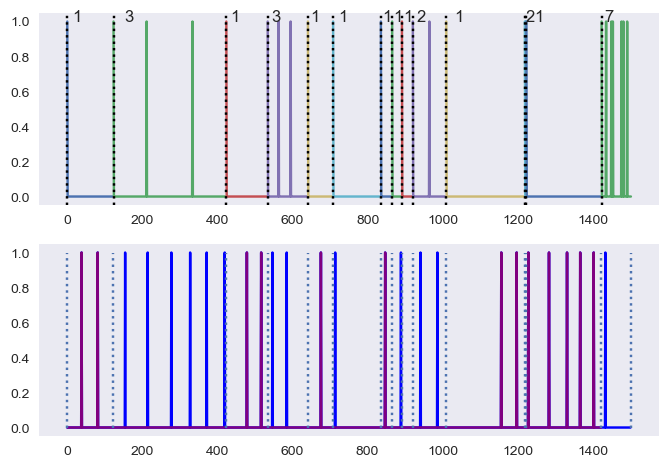

In [1501]:
last_tick = 1

plt.subplot(2, 1, 1)
for seq in find_sequence_lengths(chunk["is_combo_going"]):
    # a = np.random.normal(0, 1, 30)
    # print(a)
    # a = np.digitize(a, bins=[0])
    # print(a)

    combos = chunk.iloc[last_tick : last_tick + seq]["combo"].max()

    if combos == 0:
        continue

    ccc = np.zeros(seq)

    if combos != 1:
        chunk_size = seq // combos
        splitted = np.clip([int(i * chunk_size + np.random.normal(0, 10)) for i in range(1, combos)], 1, seq - 1)
        ccc[splitted] = 1

    ccc[0] = 1

    plt.plot(np.arange(last_tick, last_tick + seq, 1), ccc)

    plt.axvline(last_tick, ls=":", c="black")
    plt.text(0.1 * seq + last_tick, 1, str(combos), size=12)

    last_tick += seq


plt.subplot(2, 1, 2)
plt.plot(chunk["frame_count"], chunk["fruits_spawned_num"], c="blue", label="No combo")
plt.plot(chunk[chunk["is_combo_going"] == False]["frame_count"], chunk[chunk["is_combo_going"] == False]["fruits_spawned_num"], c="purple", label="Is combo")
plt.vlines(np.cumsum([1] + find_sequence_lengths(chunk["is_combo_going"])), 0, 1, ls=":")

In [1709]:
synth_chunks = find_sequence_lengths(synthetic_sequence)
synth_chunks[:10]

[23, 15, 30, 29, 63, 407, 211, 12, 132, 136]

In [1725]:
last_tick = 0
synthetic_combo_unraveled = []

is_combo = False

for i, seq in enumerate(synth_chunks):
    if is_combo:
        combos = synthetic_combo[i // 2]
        ccc = np.ones(seq, dtype=int)

        if combos != 1:
            chunk_size = seq // combos
            splitted = np.clip([int(i * chunk_size + np.random.normal(0, 10)) for i in range(1, combos)], 1, seq - 1)

            for s_i in splitted:
                ccc[s_i:] += 1

        synthetic_combo_unraveled.extend(ccc)

        # plt.plot(np.arange(last_tick, last_tick + seq, 1), ccc)

    last_tick += seq

    is_combo = not is_combo


In [1726]:
synthetic_combo_unraveled

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [1728]:
# synthetic_combo_unraveled = list(map(lambda x: [x[0]] * x[1], zip(synthetic_combo, find_sequence_lengths(synthetic_sequence))))
# synthetic_combo_flattened = sum(synthetic_combo_unraveled, [])
#
synthetic_df["combo"] = 0
synthetic_df.loc[synthetic_df["is_combo_going"], "combo"] = synthetic_combo_unraveled
synthetic_df

,cheat_flag,frame_count,session_id,is_combo_going,combo
0,0,1,8297617158,False,0
1,0,2,8297617158,False,0
2,0,3,8297617158,False,0
3,0,4,8297617158,False,0
4,0,5,8297617158,False,0
...,...,...,...,...,...
11177,0,56,8297616543,False,0
11178,0,57,8297616543,False,0
11179,0,58,8297616543,False,0
11180,0,59,8297616543,False,0


# phys_frames_since_last_combo

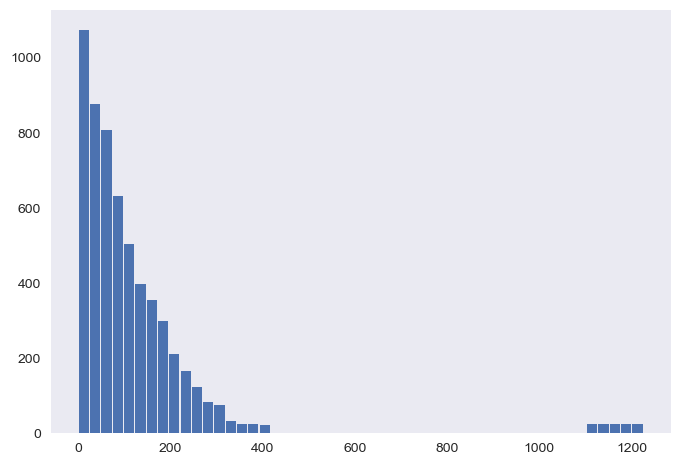

In [1499]:
plt.hist(df[df["phys_frames_since_last_combo"] != 0]["phys_frames_since_last_combo"], rwidth=0.9, bins=50);

# time_left_of_current_combo

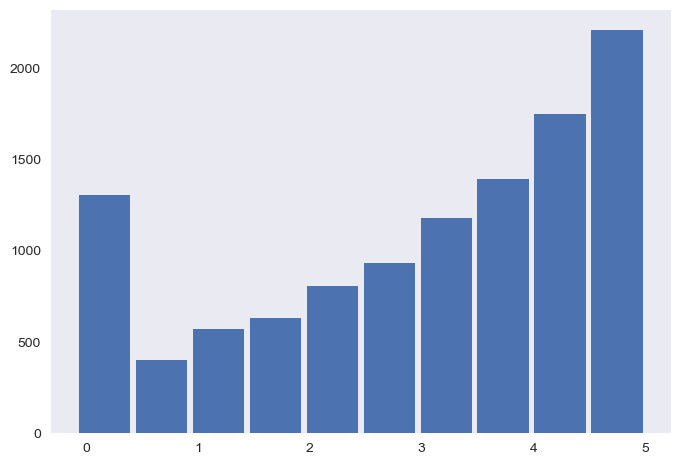

In [1500]:
plt.hist(df["time_left_of_current_combo"], rwidth=0.9, bins=10);